## James Paguay: CIS9655: MatPlotLib Dashboard Assignment

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Introduction 
I wanted to find a datasource that showed the top causes of death in New York City throughout the years. 2020 was a chaotic time period that followed high uncertainty and negativity. Whether it was covid, unemployment or political unrest, I wanted to see if these factors increased the number of deaths within the city. Unfortunately, I was unable to find data from 2018 - 2020 to explore this topic. However, I was able to find a datasource called __New York City Leading Causes of Death__.

The description for this datasource states that __"The leading causes of death by sex and ethnicity in New York City since 2007. Cause of death is derived from the NYC death certificate which is issued for every death that occurs in New York City."__ However, the years only range from 2010 to 2017. Still, this dataset contains 1000 rows, which is plenty of enough to perform data visualizations. My goal is to see what kind of pattern or relationship is within the data and display that to the audience.

The data comes from the 'NYC Open Data' website which I retreive using a link. That link is saved into a variable, which is then read using read_csv from pandas. 
https://data.cityofnewyork.us/Health/New-York-City-Leading-Causes-of-Death/jb7j-dtam

In [260]:
data_url = "https://data.cityofnewyork.us/resource/jb7j-dtam.csv"
nyc_deaths = pd.read_csv(data_url)
nyc_deaths.shape

(1000, 7)

### Data Clean Up
When I was doing some exploratory analysis, I noticed several data features that were giving me error messages. In order to solve these issues and provide visualizations, I performed data clean up.

First, the __death__ column had invalid values of '.'. Also this column series was dtype string when it had to be numeric. So the two things I had to do were drop any rows within the __death__ column that had invalid values and then convert that column from string to integer. 

Next, certain values in the __sex__ column were different but represented the same thing. The values in this column were 'Female', 'Male', 'F', and 'M'. You can see that we technically had duplicates for this column. But rather than drop the duplicates of 'F' and 'M', I replaced them with 'Female' and 'Male', respectively. 


Lastly, the __leading_cause__ column had copies of the same groups because of different spellings. I decided to fix the spellings in order to capture all dulpicates in the same group. Thus, no two leading_cause would appear twice. You can see all the changes I made below.

Once the changes were complete, I started creating data visualizations.

_Note: When dropping rows, I went from having 1000 rows to 949._

In [261]:
nyc_deaths.drop(nyc_deaths.loc[nyc_deaths['deaths'] == '.'].index, inplace = True)
nyc_deaths.shape

(949, 7)

In [262]:
nyc_deaths['deaths'] = nyc_deaths['deaths'].astype(str).astype(int)
nyc_deaths.dtypes

year                        int64
leading_cause              object
sex                        object
race_ethnicity             object
deaths                      int32
death_rate                 object
age_adjusted_death_rate    object
dtype: object

In [263]:
nyc_deaths['sex'].unique()

array(['Female', 'Male', 'M', 'F'], dtype=object)

In [264]:
nyc_deaths['sex'].replace(['F','M'], ['Female','Male'], inplace = True)

In [265]:
nyc_deaths['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [266]:
nyc_deaths['leading_cause'].unique()

array(['Essential Hypertension and Renal Diseases (I10, I12)',
       'Malignant Neoplasms (Cancer: C00-C97)',
       'Diseases of Heart (I00-I09, I11, I13, I20-I51)',
       'Cerebrovascular Disease (Stroke: I60-I69)',
       'Influenza (Flu) and Pneumonia (J09-J18)',
       'Diabetes Mellitus (E10-E14)', "Alzheimer's Disease (G30)",
       'Chronic Lower Respiratory Diseases (J40-J47)',
       'Accidents Except Drug Poisoning (V01-X39, X43, X45-X59, Y85-Y86)',
       'Intentional Self-Harm (Suicide: U03, X60-X84, Y87.0)',
       'All Other Causes',
       'Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)',
       'Chronic Liver Disease and Cirrhosis (K70, K73-K74)',
       'Human Immunodeficiency Virus Disease (HIV: B20-B24)',
       'Certain Conditions originating in the Perinatal Period (P00-P96)',
       'Congenital Malformations, Deformations, and Chromosomal Abnormalities (Q00-Q99)',
       'Anemias

In [267]:
nyc_deaths['leading_cause'].replace('Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)', 'Accidents Except Drug Poisoning (V01-X39, X43, X45-X59, Y85-Y86)', inplace = True)
nyc_deaths['leading_cause'].replace('Intentional Self-Harm (Suicide: X60-X84, Y87.0)', 'Intentional Self-Harm (Suicide: U03, X60-X84, Y87.0)', inplace = True)
nyc_deaths['leading_cause'].replace('Assault (Homicide: Y87.1, X85-Y09)', 'Assault (Homicide: U01-U02, Y87.1, X85-Y09)', inplace = True)
nyc_deaths['leading_cause'].replace('Chronic Liver Disease and Cirrhosis (K70, K73)', 'Chronic Liver Disease and Cirrhosis (K70, K73-K74)', inplace = True)

In [268]:
nyc_deaths['leading_cause'].unique()

array(['Essential Hypertension and Renal Diseases (I10, I12)',
       'Malignant Neoplasms (Cancer: C00-C97)',
       'Diseases of Heart (I00-I09, I11, I13, I20-I51)',
       'Cerebrovascular Disease (Stroke: I60-I69)',
       'Influenza (Flu) and Pneumonia (J09-J18)',
       'Diabetes Mellitus (E10-E14)', "Alzheimer's Disease (G30)",
       'Chronic Lower Respiratory Diseases (J40-J47)',
       'Accidents Except Drug Poisoning (V01-X39, X43, X45-X59, Y85-Y86)',
       'Intentional Self-Harm (Suicide: U03, X60-X84, Y87.0)',
       'All Other Causes',
       'Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)',
       'Chronic Liver Disease and Cirrhosis (K70, K73-K74)',
       'Human Immunodeficiency Virus Disease (HIV: B20-B24)',
       'Certain Conditions originating in the Perinatal Period (P00-P96)',
       'Congenital Malformations, Deformations, and Chromosomal Abnormalities (Q00-Q99)',
       'Anemias

### Exploratory Analysis

In [269]:
nyc_deaths.groupby('year', as_index = False)['deaths'].count()

,year,deaths
0,2010,32
1,2011,117
2,2012,122
3,2013,127
4,2014,129
5,2015,141
6,2016,145
7,2017,136


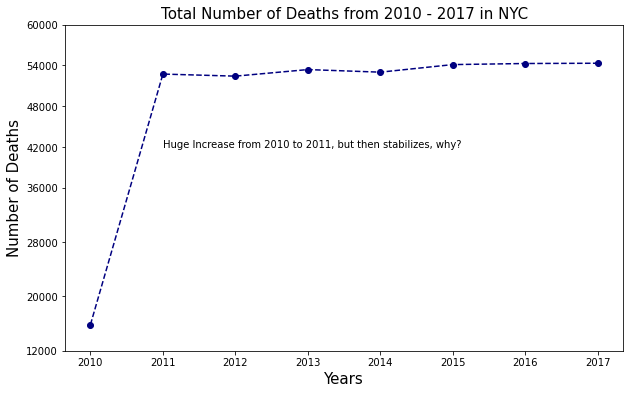

In [270]:
death_years = nyc_deaths.groupby('year', as_index = False)['deaths'].sum()
plt.figure(figsize = ((10,6)))
plt.plot('year', 'deaths', data = death_years, marker = 'o', linestyle = '--', color = 'navy')
plt.xlabel('Years', size = 15)
plt.ylabel('Number of Deaths', size = 15)
plt.title('Total Number of Deaths from 2010 - 2017 in NYC', size = 15)
plt.yticks([12000, 20000, 28000, 36000, 42000, 48000, 54000, 60000])
plt.annotate(xy=[2011,42000], text = 'Huge Increase from 2010 to 2011, but then stabilizes, why?')

plt.show()

### Total Number of Deaths from 2010 - 2017 in New York City
When the data is visualized on a line graph, you can see that the leading causes of death increase drastically from 2010 to 2011. However, from 2010 to 2011, we see the number stabilize and stay within the 52000 - 54000 range. However, when using the count function on our data, we see that for 2010 we only have 27 rows compared to the other years which have more than 100 each. This is causing an outlier in our data, so we should remove the year 2010, to have a better understanding of what the data is telling us. The y axis will be readjusted as well. 

In [271]:
#nyc_deaths[nyc_deaths['year'] == 2010].shape
nyc_deaths.drop(nyc_deaths.loc[nyc_deaths['year'] == 2010].index, inplace = True)

([<matplotlib.axis.YTick at 0x204d5fb3e50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

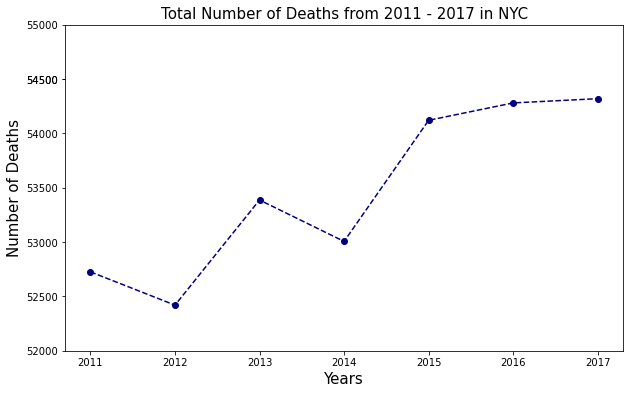

In [272]:
death_years2 = nyc_deaths.groupby('year', as_index = False)['deaths'].sum()
plt.figure(figsize = ((10,6)))
plt.plot('year', 'deaths', data = death_years2, marker = 'o', linestyle = '--', color = 'navy')
plt.xlabel('Years', size = 15)
plt.ylabel('Number of Deaths', size = 15)
plt.title('Total Number of Deaths from 2011 - 2017 in NYC', size = 15)
plt.yticks([52000, 52500, 53000, 53500, 54000, 54500, 54500, 55000])

In [273]:
gender_year = nyc_deaths.groupby(['year', 'sex'], as_index = False)['deaths'].sum()
f_years = gender_year[gender_year['sex'] == 'Female']
m_years = gender_year[gender_year['sex'] == 'Male']

years = list(m_years['year'])
m_deaths = list(m_years['deaths'])
f_deaths = list(f_years['deaths'])
num = 7

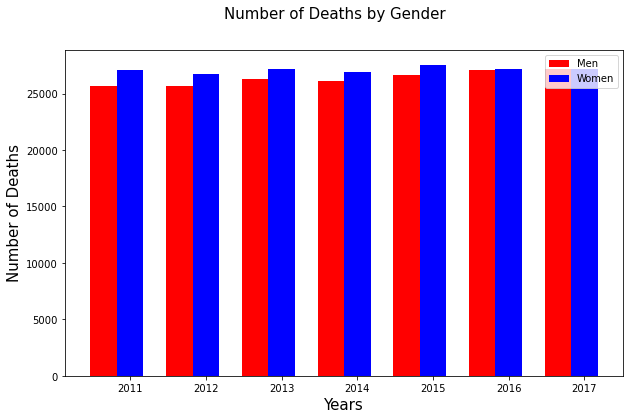

In [274]:
#fig, ax = plt.subplots()
plt.figure(figsize = ((10,6)))

index = np.arange(num)
bar_width = 0.35

rects1 = plt.bar(index, m_deaths, bar_width, label = 'Men', color = 'r')
rects2 = plt.bar(index + bar_width, f_deaths, bar_width, label = 'Women', color = 'b')

plt.xlabel('Years', size = 15)
plt.ylabel('Number of Deaths', size = 15)
plt.suptitle('Number of Deaths by Gender', size = 15)
plt.xticks(index + bar_width, years)
plt.legend()

plt.show()

### Number of Leading Deaths Per Gender From 2011 - 2017
From 2010 to 2017, we have seen the number of leading deaths be higher for women compared to men in New York City.


In [275]:
causes = nyc_deaths.groupby('leading_cause', as_index = True).sum().sort_values('deaths', ascending = False).head(5)

Text(0.5, 1.0, 'Top 5 Leading Causes of Death in NYC')

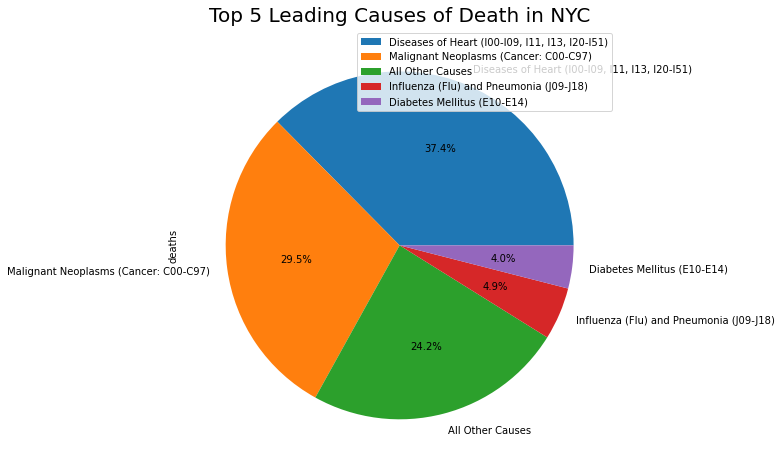

In [276]:
causes.plot.pie(y ='deaths', 
                 autopct='%1.1f%%',
                 figsize=(14, 8))
plt.title("Top 5 Leading Causes of Death in NYC", size = 20)

### Top 5 Leading Cause of Death in New York City
Based on the information above, "Diseases of the Heart" is the number one killer, followed by Malignant Neoplasms. After "All Other Causes", we have two leading causes of death which are very close to each other in percentages. 
What I decided to next was to see which ethnicities are affected by these causes the most.

However, I noticed that the ethnicities are limited and are very similar to each other. If I were to change this, then we would only have 4 ethnicies. So I decided to leave it as it is.

In [277]:
race_deaths = nyc_deaths.groupby('race_ethnicity', as_index = False)['deaths'].sum().sort_values('deaths', ascending = False)
race_deaths.reset_index(drop = True, inplace = True)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

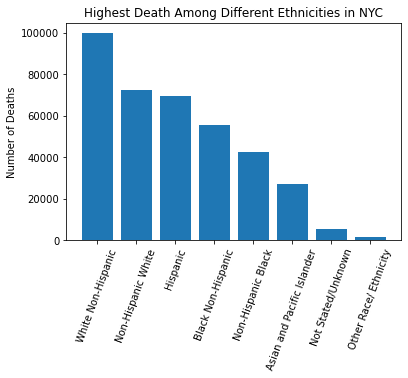

In [278]:
plt.bar(race_deaths["race_ethnicity"], race_deaths['deaths'])
plt.title("Highest Death Among Different Ethnicities in NYC")
plt.ylabel("Number of Deaths")
plt.xticks(rotation=70)

### Highest Death among different Ethnicities in NYC
I tried to display this information as a histogram, but each row or record has a multiple value for deaths. Its not a single record of death. So When I did the groupby, I had to do the sum of each death record to get the total deaths for each ethnicity. 
As we can see, the top 3 highest deaths among ethnicities are White Non-Hispanic, Non-Hispanic White, and Hispanic. Because the way this is labeled, I have to leave the different ethnicity groups as it is. 

<ipython-input-279-38754a3792b0>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(race_deaths["race_ethnicity"], rotation = 90)


Text(0.5, 1.0, 'Ethnicity Highest Death')

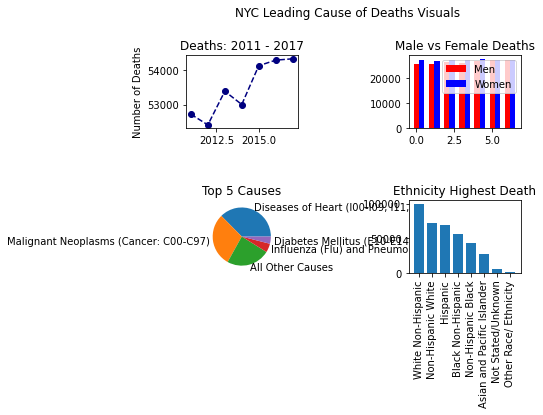

In [279]:
fig, ax = plt.subplots(2,2, sharey = False, sharex = False)
fig.subplots_adjust(hspace=.99, wspace = .99)

fig.suptitle('NYC Leading Cause of Deaths Visuals', y = 1.05)

ax[0,0].plot('year', 'deaths', data = death_years2, marker = 'o', linestyle = '--', color = 'navy')
ax[0,0].set_title('Deaths: 2011 - 2017')

ax[0,1].bar(index, m_deaths, bar_width, label = 'Men', color = 'r')
ax[0,1].bar(index + bar_width, f_deaths, bar_width, label = 'Women', color = 'b')
ax[0,1].set_title('Male vs Female Deaths')
ax[0,1].legend()
ax[0,0].set_ylabel('Number of Deaths')

c2 = nyc_deaths.groupby('leading_cause', as_index = False).sum().sort_values('deaths', ascending = False).head(5)
ax[1,0].pie('deaths', labels = 'leading_cause', data = c2)
ax[1,0].set_title('Top 5 Causes')

ax[1,1].bar(race_deaths["race_ethnicity"], race_deaths['deaths'])
ax[1,1].set_xticklabels(race_deaths["race_ethnicity"], rotation = 90)
ax[1,1].set_title('Ethnicity Highest Death')

### Only Four Visual Types
I was only able to create four visual types since I was limited by the data I used. Only one column was numeric while the rest were categorical. I could not use scatter plots or histograms. Histograms could not be done with the records I have since each row contained a multiple values, ex. the deaths column. The histogram made no sense when I graphed it.